In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../build')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../build/Release')))

import mathml_cpp

# Capítulo 2: Álgebra Lineal
## 1. Proyección de Vectores

In [2]:
# Definimos dos vectores
v = np.array([3.0, 1.0])
w = np.array([2.0, 2.0])

# Calculamos la proyeccion de v sobre w usando nuestro modulo C++
proj_v_on_w = mathml_cpp.linear_algebra.project_vector(v, w)

print(f"Vector v: {v}")
print(f"Vector w: {w}")
print(f"Proyeccion de v sobre w: {proj_v_on_w}")

Vector v: [3. 1.]
Vector w: [2. 2.]
Proyeccion de v sobre w: [2. 2.]


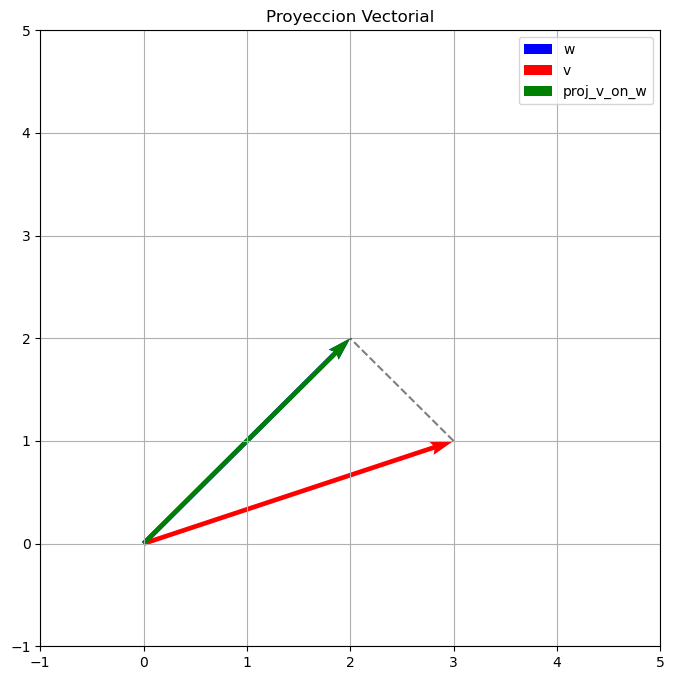

In [3]:
# Visualizacion
origin = np.array([0, 0])

plt.figure(figsize=(8, 8))
plt.quiver(*origin, *w, color='b', scale=1, scale_units='xy', angles='xy', label='w')
plt.quiver(*origin, *v, color='r', scale=1, scale_units='xy', angles='xy', label='v')
plt.quiver(*origin, *proj_v_on_w, color='g', scale=1, scale_units='xy', angles='xy', label='proj_v_on_w')

# Conectamos v con su proyeccion
plt.plot([v[0], proj_v_on_w[0]], [v[1], proj_v_on_w[1]], 'k--', alpha=0.5)

plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.grid()
plt.legend()
plt.title("Proyeccion Vectorial")
plt.show()

## 2. Sistemas de Ecuaciones Lineales
Resolvemos $Ax = b$ usando descomposición QR.

In [4]:
# Definimos Matriz A y vector b
A = np.array([[2.0, 1.0], [1.0, 3.0]])
b = np.array([1.0, 2.0])

print("Matriz A:\n", A)
print("Vector b:", b)

# Resolvemos Ax = b
x = mathml_cpp.linear_algebra.solve_linear_system(A, b)

print("\nSolucion x:", x)

# Verificacion Ax
b_calc = A @ x
print("Verificacion A @ x:", b_calc)

Matriz A:
 [[2. 1.]
 [1. 3.]]
Vector b: [1. 2.]

Solucion x: [0.2 0.6]
Verificacion A @ x: [1. 2.]


## 3. Propiedades de Matrices
Calculamos determinante, traza y rango.

In [5]:
M = np.array([[1.0, 2.0, 3.0], 
              [4.0, 5.0, 6.0], 
              [7.0, 8.0, 9.0]])

print("Matriz M:\n", M)

det = mathml_cpp.linear_algebra.calculate_determinant(M)
trace = mathml_cpp.linear_algebra.calculate_trace(M)
rank = mathml_cpp.linear_algebra.calculate_rank(M)

print("Determinante:", det)
print("Traza:", trace)
print("Rango:", rank)

if abs(det) > 1e-10:
    inv = mathml_cpp.linear_algebra.calculate_inverse(M)
    print("\nInversa:\n", inv)
else:
    print("\nLa matriz es singular (determinante ~ 0), no tiene inversa.")

Matriz M:
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
Determinante: 6.661338147750939e-16
Traza: 15.0
Rango: 2

La matriz es singular (determinante ~ 0), no tiene inversa.
